# **jika menggunakan metode RLS**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d abrambeyer/openintro-possum

  0% 0.00/2.15k [00:00<?, ?B/s]
100% 2.15k/2.15k [00:00<00:00, 1.19MB/s]


In [ ]:
!unzip -qq openintro-possum.zip -d dataset

In [ ]:
!ls dataset

possum.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/dataset/possum.csv')

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  3


# **Cara normal untuk mengatasi missing value**

In [ ]:
df.age = df.age.fillna(df.age.median())
df.footlgth = df.footlgth.fillna(df.footlgth.median())

# **Cara psikopat untuk mengatasi missing value**

In [ ]:
DT_foot_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])

X = df[['footlgth','taill']].copy()

Missing = X[X.footlgth.isna()]
X = X[~X.footlgth.isna()]
Y = X.pop('footlgth')
DT_foot_pipe.fit(X,Y)
predicted_footlgth = pd.Series(DT_foot_pipe.predict(Missing[['taill']]),index=Missing.index)
df.loc[Missing.index,'footlgth'] = predicted_footlgth

In [ ]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

# **EDA**

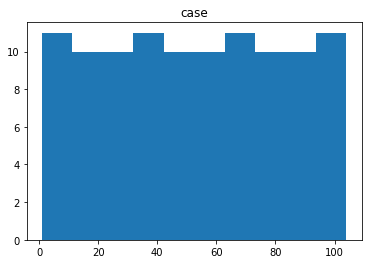

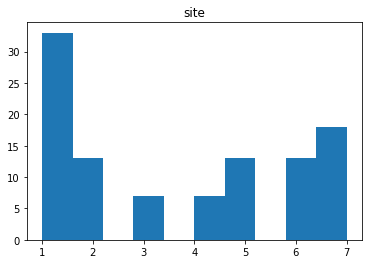

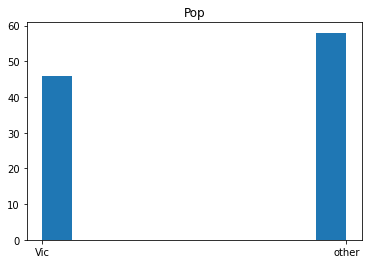

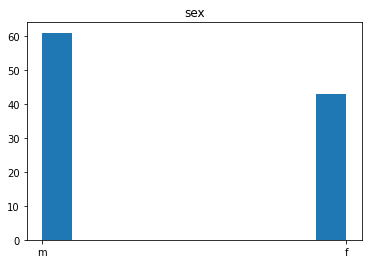

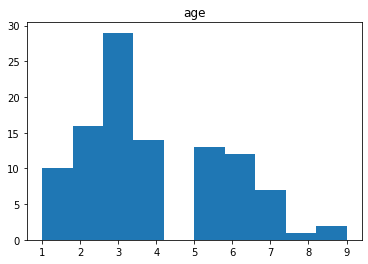

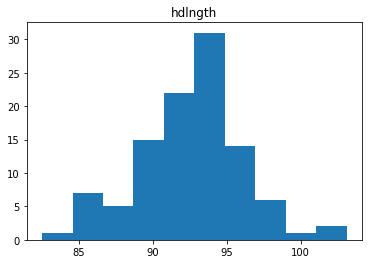

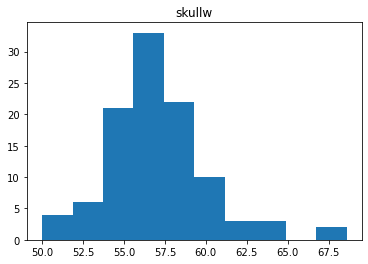

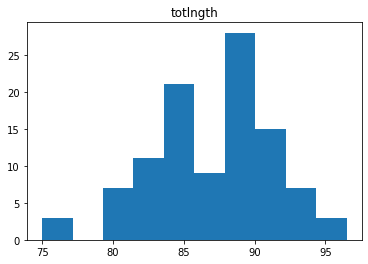

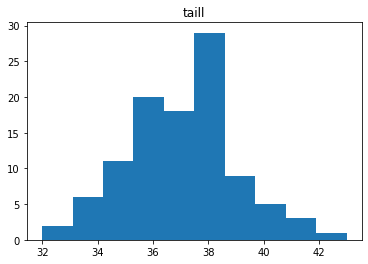

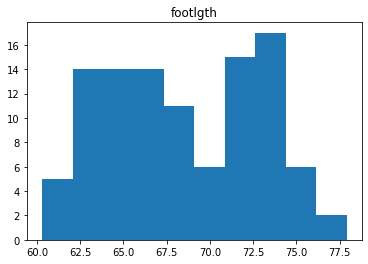

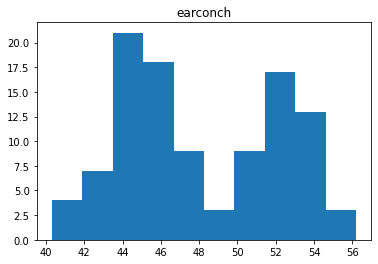

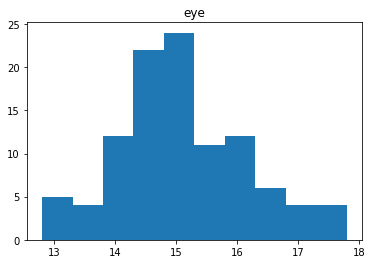

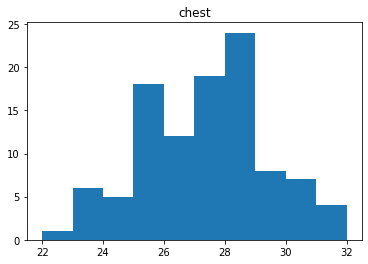

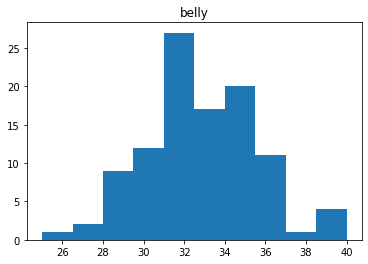

In [ ]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

# **Line Regresi dengan cara manual**

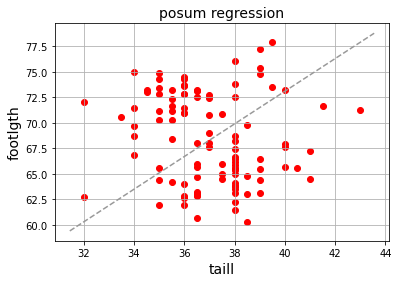

In [ ]:
plt.scatter(df['taill'], df['footlgth'], color='red' )
plt.title('posum regression', fontsize=14)
plt.xlabel('taill', fontsize=14)
plt.ylabel('footlgth', fontsize=14)
plt.grid(True)
ax = plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".6")
plt.show()

<Axes: xlabel='taill', ylabel='footlgth'>

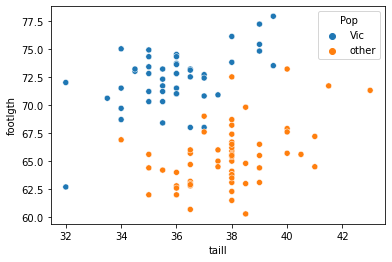

In [ ]:
sns.scatterplot(x = df['taill'],y = df['footlgth'],hue = df['Pop'] ,palette='tab10')

# **line regresi dengan cara library**

<Axes: xlabel='taill', ylabel='footlgth'>

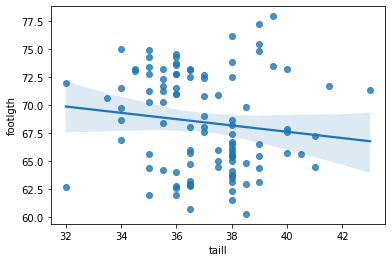

In [ ]:
sns.regplot(x = df['taill'],y = df['footlgth'], data=df.columns)

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df['Pop'] = df['Pop'].replace({'Vic':0,'other':1}).astype(np.uint8)
df['sex'] = df['sex'].replace({'f':0,'m':1}).astype(np.uint8)

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
x = df['taill']
y = df['footlgth']

In [ ]:
x_value = x.values
y_value = y.values

x_reshape = x_value.reshape(-1, 1)
y_reshape = y_value.reshape(-1, 1)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_reshape, y_reshape)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [78.86124821]
Coefficients: 
 [[-0.28118208]]


In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               footlgth   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.644
Date:                Mon, 27 Mar 2023   Prob (F-statistic):              0.203
Time:                        08:44:45   Log-Likelihood:                -299.71
No. Observations:                 104   AIC:                             603.4
Df Residuals:                     102   BIC:                             608.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.8612      8.126      9.705      0.0

# **jika menggunakan metode RLB**

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df.drop('case',axis=1,inplace = True)

In [ ]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
x = df[['taill','Pop','sex']]
y = df['footlgth']

In [ ]:
x_reshape.shape

(104, 1)

In [ ]:
y_reshape.shape

(104, 1)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 43.19932539016002
Coefficients: 
 [ 0.79991171 -8.58579606  0.74895343]


In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x) 
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               footlgth   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     83.87
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.40e-27
Time:                        08:47:27   Log-Likelihood:                -235.16
No. Observations:                 104   AIC:                             478.3
Df Residuals:                     100   BIC:                             488.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1993      5.029      8.590      0.0